In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df=pd.read_csv("D:\Downloads\Cleaned_googleplaystore.csv")

In [4]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Day                  0
Month                0
Year                 0
dtype: int64

In [5]:
df.isnull().sum().sum()

3180

In [7]:
df.isnull().sum().sort_values(ascending=False)

Size              1695
Rating            1474
Current Ver          8
Android Ver          2
Type                 1
App                  0
Category             0
Reviews              0
Installs             0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Day                  0
Month                0
Year                 0
dtype: int64

In [8]:
df.shape

(10840, 16)

In [9]:
df[df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [10]:
df=df.drop_duplicates()

In [11]:
df.shape

(10357, 16)

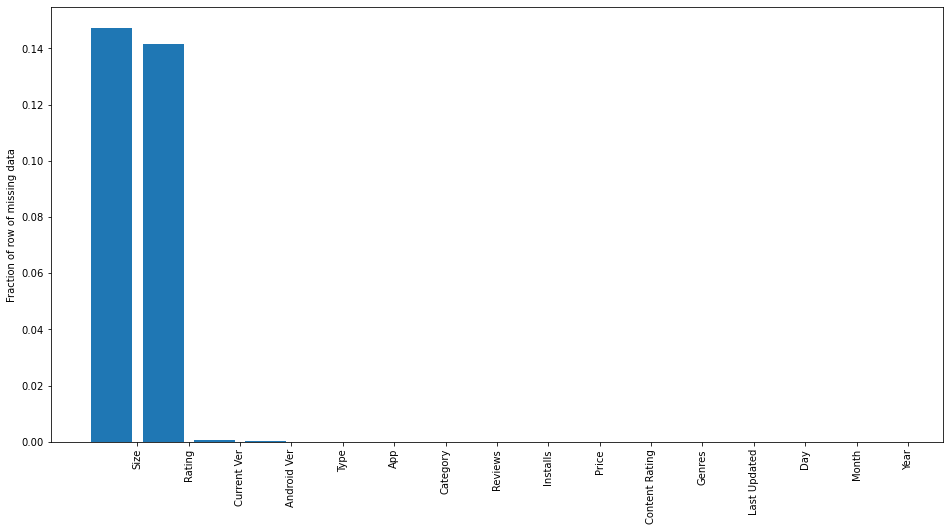

In [13]:
null_counts=df.isnull().sum().sort_values(ascending=False)/len(df)
plt.figure(figsize=(16,8))
plt.xticks(np.arange(len(null_counts))+0.5,null_counts.index,rotation='vertical')
plt.ylabel("Fraction of row of missing data")
plt.bar(np.arange(len(null_counts)),null_counts)
plt.show()

In [15]:
df_copy=df.copy()

In [17]:
cols=[var for var in df_copy.columns if df_copy[var].isnull().mean()*100]

In [24]:
[var for var in df_copy.columns]
    #print(var)
    

['App',
 'Category',
 'Rating',
 'Reviews',
 'Size',
 'Installs',
 'Type',
 'Price',
 'Content Rating',
 'Genres',
 'Last Updated',
 'Current Ver',
 'Android Ver',
 'Day',
 'Month',
 'Year']

In [20]:
df_copy["Rating"].isnull().mean()*100

14.145022689968137

In [21]:
df_copy["Installs"].isnull().mean()*100

0.0

In [18]:
cols

['Rating', 'Size', 'Type', 'Current Ver', 'Android Ver']

In [28]:
drop_df=df_copy[cols].dropna()

In [29]:
df_copy.shape

(10357, 16)

In [30]:
drop_df.shape

(7418, 5)

<AxesSubplot:xlabel='Rating', ylabel='Density'>

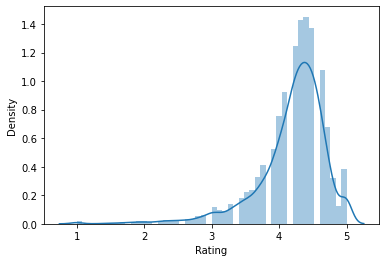

In [33]:
sns.distplot(df_copy['Rating'])

<AxesSubplot:xlabel='Rating', ylabel='Density'>

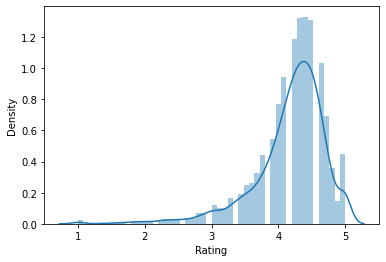

In [34]:
sns.distplot(drop_df['Rating'])

# mean,median,mode

In [38]:
df_copy_me_mo=df.copy()

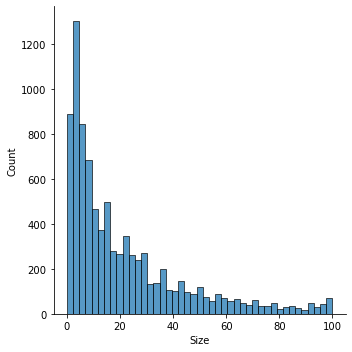

In [46]:
sns.displot(df['Size'])

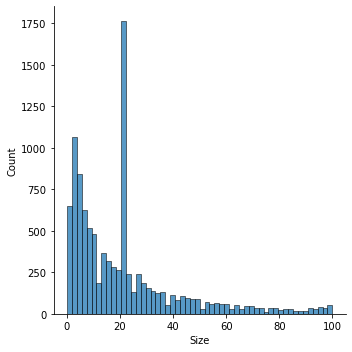

In [47]:
sns.displot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].mean()))

<AxesSubplot:xlabel='Size', ylabel='Density'>

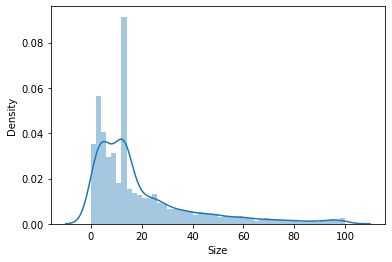

In [50]:
sns.distplot(df_copy_me_mo['Size'].fillna(df_copy_me_mo['Size'].median()))

# random sample imputation

In [51]:
df_random=df.copy()

In [55]:
df_random['Size'].isnull().sum()

1526

In [58]:
random_sample=df_random['Size'].dropna().sample(df_random['Size'].isnull().sum())

In [59]:
random_sample

5317    28.000
5853     3.000
9746    37.000
5125    74.000
3393     0.920
         ...  
9371     0.921
7537    17.000
2559     2.800
827      6.900
1249    17.000
Name: Size, Length: 1526, dtype: float64

In [63]:
random_sample.index=df_random[df_random['Size'].isnull()].index

In [64]:
df_random.loc[df_random["Size"].isnull(),"Size"]=random_sample